# UFO Sightings

## Overview

## Business Problem

I am working with a television network who wants to create a special program about UFO sightings in America in the past couple years. They want to see specific trendlines about these UFO sightings and observations about their occurences.

## Data Source

https://www.kaggle.com/datasets/NUFORC/ufo-sightings?resource=download

## Results

## Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Polygon
import missingno as msno
import os
import wget
import openpyxl
import math

In [2]:
#reads in UFO database
df = pd.read_csv("data/complete.csv", error_bad_lines=False) #some lines had 12 values rather than 11, bad lines

b'Skipping line 878: expected 11 fields, saw 12\nSkipping line 1713: expected 11 fields, saw 12\nSkipping line 1815: expected 11 fields, saw 12\nSkipping line 2858: expected 11 fields, saw 12\nSkipping line 3734: expected 11 fields, saw 12\nSkipping line 4756: expected 11 fields, saw 12\nSkipping line 5389: expected 11 fields, saw 12\nSkipping line 5423: expected 11 fields, saw 12\nSkipping line 5614: expected 11 fields, saw 12\nSkipping line 5849: expected 11 fields, saw 12\nSkipping line 6093: expected 11 fields, saw 12\nSkipping line 7516: expected 11 fields, saw 12\nSkipping line 7626: expected 11 fields, saw 12\nSkipping line 8893: expected 11 fields, saw 12\nSkipping line 9015: expected 11 fields, saw 12\nSkipping line 9571: expected 11 fields, saw 12\nSkipping line 9620: expected 11 fields, saw 12\nSkipping line 9751: expected 11 fields, saw 12\nSkipping line 10157: expected 11 fields, saw 12\nSkipping line 10427: expected 11 fields, saw 12\nSkipping line 12035: expected 11 fiel

In [3]:
df

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
88674,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972,-122.284444
88675,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011,-77.265556
88676,9/9/2013 23:00,edmond,ok,us,cigar,1020,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.6528,-97.477778
88677,9/9/2013 23:00,starr,sc,us,diamond,0,2 nights,On September ninth my wife and i noticed stran...,9/30/2013,34.3769,-82.695833


In [4]:
df["year"] = [int(date[-10:-6]) for date in df['datetime'].values]
df = df.loc[df["year"] > 1993]
df = df.loc[df["year"] < 2014]

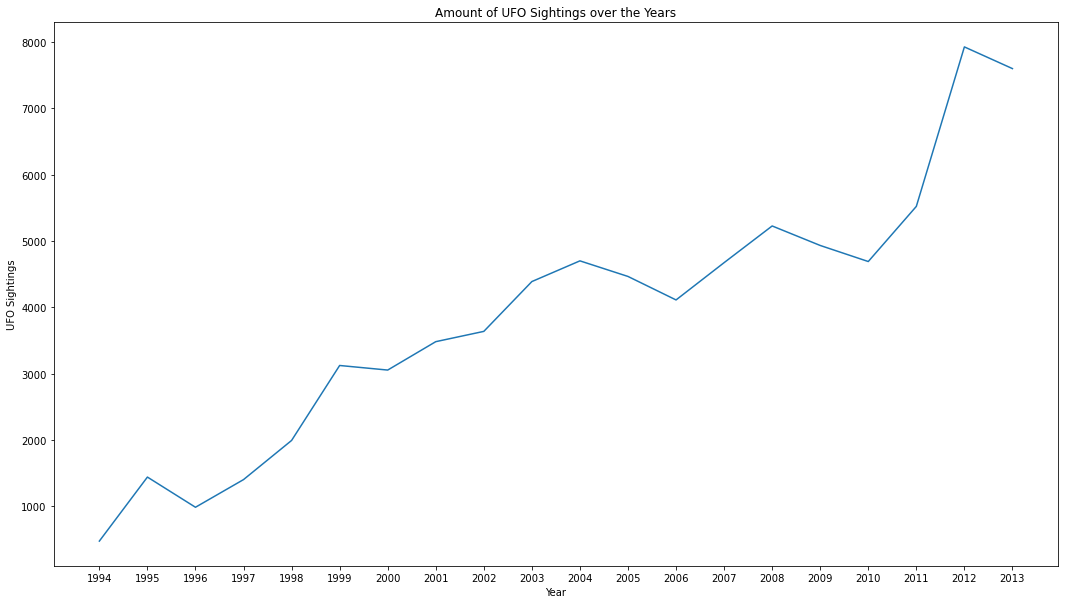

In [5]:
#graph for amount of UFO sightings over the years
years = df["year"].value_counts().sort_index()
plt.figure(figsize=(18,10))
plt.xticks(years.index)
plt.plot(years.index, years.values)
plt.xlabel("Year")
plt.ylabel("UFO Sightings")
plt.title("Amount of UFO Sightings over the Years")
plt.show()

False    67471
True     10353
Name: country, dtype: int64


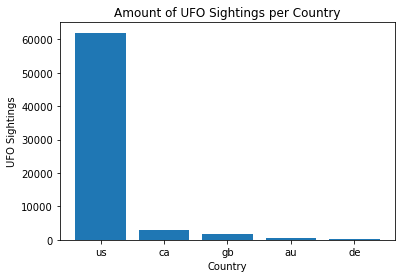

In [6]:
#graph of amount of UFO sightings per country
print(df["country"].isna().value_counts())
country = df["country"].value_counts()
plt.bar(country.index, country.values)
plt.xlabel("Country")
plt.ylabel("UFO Sightings")
plt.title("Amount of UFO Sightings per Country")
plt.show()
df = df.loc[df["country"] == "us"]

In [7]:
df["state"].value_counts() #highest occurence in california 

ca    8515
wa    3956
fl    3635
tx    3275
ny    2768
il    2459
az    2408
pa    2200
oh    2149
mi    1744
or    1710
nc    1644
mo    1394
co    1379
in    1237
va    1205
ga    1172
wi    1170
nj    1166
ma    1162
tn    1089
mn     973
sc     960
ct     830
ky     790
nv     778
md     769
nm     678
ok     677
ia     654
ut     581
al     577
ks     576
ar     564
me     511
id     505
la     494
mt     466
nh     442
wv     420
ne     368
ms     335
ak     280
vt     260
hi     236
ri     218
sd     173
wy     168
de     154
nd     120
pr      17
dc       7
Name: state, dtype: int64

In [9]:
df["shape"].value_counts() #highest occurence shape is light

light        13093
triangle      6155
circle        5852
fireball      5016
unknown       4506
other         4206
sphere        3961
disk          3240
oval          2782
formation     1914
changing      1588
cigar         1394
flash         1097
rectangle      958
cylinder       951
diamond        900
chevron        747
teardrop       591
egg            555
cone           258
cross          195
delta            5
round            2
pyramid          1
crescent         1
changed          1
flare            1
hexagon          1
Name: shape, dtype: int64